In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

## Expectation and Variance ##

If a random variable $X$ has density $f$, the expectation $E(X)$ is defined by

$$
E(X) ~ = ~ \int_{-\infty}^\infty xf(x)dx
$$

This is parallel to the definition of the expectation of a discrete random variable $X$:

$$
E(X) ~ = ~ \sum_{\text{all }x} xP(X=x)
$$

**Technical Note:** Not all integrals are finite, and some don't even exist. But in this class you don't have to worry about that. All random variables we encounter will have finite expectations and variances.

If $X$ has density $f$ then the expected square $E(X^2)$ is defined by

$$
E(X^2) ~ = ~ \int_{-\infty}^\infty x^2f(x)dx
$$

This is parallel to the definition of the expected square of a discrete random variable $X$:

$$
E(X^2) ~ = ~ \sum_{\text{all }x} x^2P(X=x)
$$

Whether $X$ has a density or is discrete, the variance of $X$ is defined as 

$$
Var(X) ~ = ~ E(X^2) - \big{(}E(X)\big{)}^2
$$

and the standard deviation of $X$ is defined as

$$
SD(X) ~ = ~ \sqrt{Var(X)}
$$

Properties of expectation and variance are the same as before. For example,

- Linear functions: $E(aX+b) = aE(X) + b$, $SD(aX+b) = \vert a \vert SD(X)$
- Additivity of expectation: $E(X+Y) = E(X) + E(Y)$
- Independence: $X$ and $Y$ are independent if $P(X \in A, Y \in B) = P(X \in A)P(Y \in B)$ for all numerical sets $A$ and $B$.
- Addition rule for variance: If $X$ and $Y$ are independent, then $Var(X+Y) = Var(X)+Var(Y)$

The Central Limit Theorem holds too: If $X_1, X_2, \ldots $ are i.i.d. then for large $n$ the distribution of $S_n = \sum_{i=1}^n X_i$ is approximately normal.

So if you are working with a random variables that has a density, you have to know how to find probabilities, expectation, and variance using the density function. After that, probabilities and expectations combine just as they did in the discrete case.

### Calculating Expectation and SD ###
Let $X$ have density given by

$$
f(x) ~ = ~ 
\begin{cases}
6x(1-x) ~~~ 0 < x < 1 \\
0 ~~~~~~~~~~~~~~~~~ \text{otherwise}
\end{cases}
$$

As we saw in the previous section, the density of $X$ is symmetric about $0.5$ and so $E(X)$ must be $0.5$. This is consistent with the answer we get by applying the definition of expectation above:

$$
\begin{align*}
E(X) ~ &= ~ \int_0^1 x6x(1-x)dx \\
&= ~ 6 \int_0^1 (x^2-x^3)dx \\
&=~ \frac{6}{3} - \frac{6}{4} ~ = ~ \frac{6}{12} ~ = ~ 0.5
\end{align*}
$$

To find $Var(X)$ we start by finding $E(X^2)$. We'll speed up the calculus as it is similar to the above.

$$
E(X^2) ~ = ~ \int_0^1 x^26x(1-x)dx ~ = ~ \frac{6}{4} - \frac{6}{5} ~ = ~ 0.3
$$

So

$$
Var(X) ~ = ~ 0.3 - 0.5^2 = 0.05
$$

and 

$$
SD(X) ~ = ~ \sqrt{0.05} ~ \approx 0.22
$$

In [2]:
0.05 ** 0.5

0.22360679774997896

### Uniform $(0, 1)$ Distribution ###
A random variable $U$ has the *uniform* distribution on the unit interval $(0, 1)$ if its density $f$ is constant over the interval:

$$
f(u) ~ = ~ 
\begin{cases}
1 ~~~~~~ 0 < u < 1 \\
0 ~~~~~~ \text{otherwise}
\end{cases}
$$

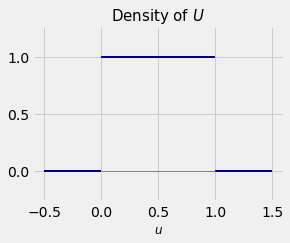

In [3]:
# NO CODE

plt.figure(figsize=(4,3))
plt.axes().set_aspect('equal','datalim')
plt.plot([0, 1], [1, 1], color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.plot([0, 1], [0, 0], color='grey', lw=1)
plt.yticks([0, 1/2, 1])
plt.xlabel('$u$', fontsize=12)
plt.ylabel('')
plt.title('Density of $U$', fontsize=15);

The probability of an interval is the length of the interval. For $0 < u_1 < u_2 < 1$,

$$
P(u_1 < U < u_2) ~ = ~ u_2 - u_1
$$

This is the area of the gold rectangle in the figure below.

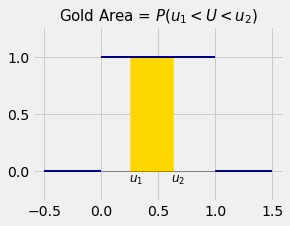

In [4]:
# NO CODE

plt.figure(figsize=(4,3))
plt.axes().set_aspect('equal','datalim')
plt.plot([0, 1], [1, 1], color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.plot([0, 1], [0, 0], color='grey', lw=1)
u1 = 1/4
u2 = 5/8
x = np.arange(u1, u2+0.01, .01)
y = np.ones(len(x))
plt.fill_between(x, y, color='gold')
plt.text(u1-0.01, -0.1, '$u_1$', fontsize=12)
plt.text(u2-0.01, -0.1, '$u_2$', fontsize=12)
plt.yticks([0, 1/2, 1])
plt.ylabel('')
plt.title('Gold Area = $P(u_1 < U < u_2)$', fontsize=15);

The cdf of $U$ is given by:

- $F(x) = 0$ for $x \le 0$
- $F(x) = P(0 < U \le x) = x$ for $0 < x < 1$
- $F(x) = 1$ for $x \ge 1$

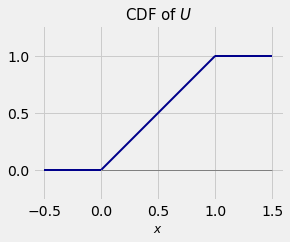

In [5]:
# NO CODE

plt.figure(figsize=(4,3))
plt.axes().set_aspect('equal','datalim')
plt.plot([0, 1], [0, 1], color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [1, 1], color='darkblue', lw=2)
plt.plot([0, 1.5], [0, 0], color='grey', lw=1)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('')
plt.title('CDF of $U$', fontsize=15);

Clearly $E(U) = 0.5$ by symmetry, and 

$$
E(U^2) ~ = ~ \int_0^1 u^2\cdot 1du ~ = ~ \frac{1}{3}
$$

So

$$
Var(U) ~ = ~ \frac{1}{3} - \frac{1}{4} ~ = ~ \frac{1}{12}
$$

and

$$
SD(U) ~ = ~ \frac{1}{\sqrt{12}}
$$

### Uniform $(a, b)$ Distribution ###

For any $a < b$, the random variable $X$ has the uniform distribution on the interval $(a, b)$ if its density is constant over the interval. The total area under the density has to be 1, so the density function is given by

$$
f_X(x) ~ = ~ 
\begin{cases}
\frac{1}{b-a} ~~~~~~ a < x < b \\
0 ~~~~~~ \text{otherwise}
\end{cases}
$$

The probability of an interval is its *relative* length: for $a < x_1 < x_2 < b$,

$$
P(x_1 < X < x_2) ~ = ~ \frac{x_2 - x_1}{b-a}
$$

By symmetry, $E(X)$ is halfway between $a$ and $b$:

$$
E(X) ~ = ~ \frac{a+b}{2}
$$

No integration is needed for the variance either, because you can write $X$ as a linear function of $U$ where $U$ is uniform on $(0, 1)$. Both have flat densities, so you can get from one to the other by stretching and shifting the values appropriately:

- The random variable $(b-a)U$ has the uniform distribution on $(0, b-a)$.
- The random variable $(b-a)U + a$ has the uniform distribution on $(a, b)$.

Conversely $X - a$ has the uniform distribution on $(0, b-a)$, and $\frac{X-a}{b-a}$ has the uniform distribution on $(0, 1)$.

Thus if $X$ is uniform on $(a, b)$ then

$$
X ~ = ~ (b-a)U + a
$$

where $U$ is uniform on $(0, 1)$. So

$$
Var(X) ~ = ~ (b-a)^2Var(U) ~ = ~ (b-a)^2\frac{1}{12}
$$

and

$$
SD(X) ~ = ~ \frac{b-a}{\sqrt{12}}
$$